
# **Análisis base de datos Titanic**




##### *Wilmar Murillo Carmona*

   


# Importación de librerias 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
url = "/kaggle/input/titanic/train.csv"
url1= "/kaggle/input/titanic/test.csv"

# Importación de datos 

In [3]:
df_train = pd.read_csv(url)
df_test = pd.read_csv(url1)

# Visualización datos 

In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df_train.info()
print('_'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

# Normalización de datos 

### Conjunto de datos df_train 

In [7]:
 # Verificación de  columnas 
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
# Verificar valores nulos 
pd.isnull(df_train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,0
mean,29.699118
Median,28.0
Mode,0 24.0 dtype: float64


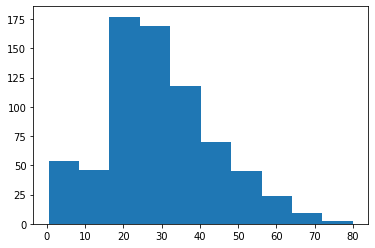

In [9]:
# Verificación del sesgo para reemplazar por medidas de tendencia central 
x = df_train.Age
plt.hist(x)
plt.show
mean =df_train.Age.mean()
median =df_train.Age.median()
mode = df_train.Age.mode()

Columns = ["mean","Median","Mode"]
rows = [mean, median, mode]
data_f = pd.DataFrame(rows, Columns)
data_f


####  Embarked,Sex y Age   

In [10]:
# Reemplazo de variable Age por la mediana 
median =df_train.Age.median()
df_train["Age"]= df_train["Age"].replace(np.nan, median)
#Convertir vaariabele Age a int
df_train["Age"]=df_train["Age"].apply(int)

In [11]:
# Verificación de variables categoricas  para pasar a variables numericas 
print('Embarked:',  df_train['Embarked'].unique(),  '\n')
print('_'*40)
print('Sex:',  df_train['Sex'].unique(),  '\n')

Embarked: ['S' 'C' 'Q' nan] 

________________________________________
Sex: ['male' 'female'] 



In [12]:

#Sex
df_train["Sex"].replace(["female","male"], [0,1 ], inplace=True)

#Embarked
df_train["Embarked"].replace(["S","C","Q"], [0,1,2], inplace=True)
modian=df_train.Embarked.median()
df_train["Embarked"]= df_train["Embarked"].replace(np.nan, median)
df_train["Embarked"]=df_train["Embarked"].apply(int)

In [13]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,1


In [14]:
# Verificar valores nulos nuevamente 
pd.isnull(df_train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034322,-0.057527,-0.001652,0.012658,-0.013313
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064909,-0.035322,0.081629,0.257307,0.101439
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339999,0.083081,0.018443,-0.549500,-0.047728
Sex,0.042939,-0.543351,0.131900,1.000000,0.080750,-0.114631,-0.245489,-0.182333,-0.109532
Age,0.034322,-0.064909,-0.339999,0.080750,1.000000,-0.233066,-0.172745,0.096838,0.064400
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233066,1.000000,0.414838,0.159651,-0.046713
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172745,0.414838,1.000000,0.216225,-0.054848
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096838,0.159651,0.216225,1.000000,0.068752
Embarked,-0.013313,0.101439,-0.047728,-0.109532,0.064400,-0.046713,-0.054848,0.068752,1.000000


<AxesSubplot:>

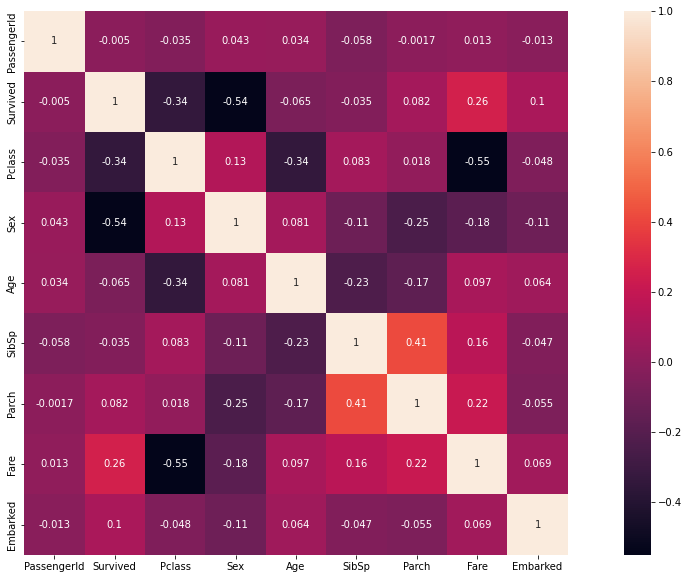

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), square=True, annot = True)

### Conjunto de datos df_test

In [17]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
# Reemplazo de variable Age por la mediana 
median =df_train.Age.median()
df_test["Age"]= df_test["Age"].replace(np.nan, median)
#Convertir vaariabele Age a int
df_test["Age"]=df_test["Age"].apply(int)
#Sex
df_test["Sex"].replace(["female","male"], [0,1 ], inplace=True)

#Embarked
df_test["Embarked"].replace(["S","C","Q"], [0,1,2], inplace=True)
df_test["Embarked"]=df_test["Embarked"].apply(int)
#Cabin
df_test.drop(["Cabin"], axis=1 , inplace=True)
#PassengerId
df_test.drop(["PassengerId"], axis=1 , inplace=True)
#Name
df_test.drop(["Name"], axis=1 , inplace=True)
#Ticket
df_test.drop(["Ticket"], axis=1 , inplace=True)



In [20]:
df_test


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,2
1,3,0,47,1,0,7.0000,0
2,2,1,62,0,0,9.6875,2
3,3,1,27,0,0,8.6625,0
4,3,0,22,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,28,0,0,8.0500,0
414,1,0,39,0,0,108.9000,1
415,3,1,38,0,0,7.2500,0
416,3,1,28,0,0,8.0500,0


# Selección del modelo ML

In [21]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [22]:
from sklearn.model_selection import train_test_split

In [23]:
Caract =["Pclass","Sex","Age","SibSp","Parch","Fare", "Embarked"]
target = df_train.Survived


X =df_train[Caract]
y = target



In [24]:
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size = 0.20, random_state = 42)

### KNeighbor_model 

In [25]:
KNeig_model=KNeighborsClassifier()
KNeig_model.fit(X,y)


KNeighborsClassifier()

In [26]:
print(KNeig_model.predict(X.head()))
print(df_train.Survived.head())

[0 1 1 1 0]
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [27]:
KNeig_model.score(X,y)

0.8013468013468014

### SVC_Model

In [28]:
SVC_model=SVC()
SVC_model.fit(X,y)


SVC()

In [29]:
print(SVC_model.predict(X.head()))
print(df_train.Survived.head())

[0 1 0 1 0]
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [30]:
SVC_model.score(X,y)

0.6857463524130191

### DecisionTree_model

In [31]:
Dec_model=DecisionTreeClassifier()
Dec_model.fit(X,y)

DecisionTreeClassifier()

In [32]:
print(Dec_model.predict(X.head()))
print(df_train.Survived.head())

[0 1 1 1 0]
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [33]:
Dec_model.score(X,y)

0.9797979797979798